# Preliminaries and Dataframe Construction

In [1]:
# Import modules
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

#Formatting
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs
sns.set_palette(sns.color_palette('Accent')) #set color palette to a nice seaborn style https://seaborn.pydata.org/tutorial/color_palettes.html


protocol_order=['Age', 'SOFA', 'New York', 'Maryland', 'Colorado']

## Survival rates by capacity

In [2]:
stats_overall_Mix = pd.read_excel('MC-Mix-results-stats.xlsx', sheet_name='Overall').replace({'Bhavani': 'Multi-principle'})
stats_race_Mix = pd.read_excel('MC-Mix-results-stats.xlsx', sheet_name='Race').replace({'Bhavani': 'Multi-principle'})

In [3]:
stats_Cho_overall_Mix = pd.read_excel('MC-Mix-results-stats.xlsx', sheet_name='Cho_Overall').replace({'Bhavani': 'Multi-principle'})
stats_Cho_race_Mix = pd.read_excel('MC-Mix-results-stats.xlsx', sheet_name='Cho_Race').replace({'Bhavani': 'Multi-principle'})

In [4]:
#Alternative way of deriving CIs over the parameters derived in the runs - i.e. traditional CIs across the rates in each run.

def get_CIs_rates(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                A_rate=pd.NamedAgg(column="A_rate", aggfunc="mean"),
                A_std=pd.NamedAgg(column="A_rate", aggfunc="std"),
                A_sem=pd.NamedAgg(column="A_rate", aggfunc="sem"),
                S_rate=pd.NamedAgg(column="S_rate", aggfunc="mean"),
                S_std=pd.NamedAgg(column="S_rate", aggfunc="std"),
                S_sem=pd.NamedAgg(column="S_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(A_rate_CI_lo = lambda df_: df_['A_rate'] - 1.96* df_['A_sem'],
                A_rate_CI_hi = lambda df_:df_['A_rate'] + 1.96* df_['A_sem'],
                S_rate_CI_lo = lambda df_: df_['S_rate'] - 1.96* df_['S_sem'],
                S_rate_CI_hi = lambda df_:df_['S_rate'] + 1.96* df_['S_sem'],
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Survived','Allocated','A_rate','A_rate_CI_lo','A_rate_CI_hi', 'S_rate', 'S_rate_CI_lo', 'S_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

def get_CIs_rates_with_AA(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                A_rate=pd.NamedAgg(column="A_rate", aggfunc="mean"),
                A_std=pd.NamedAgg(column="A_rate", aggfunc="std"),
                A_sem=pd.NamedAgg(column="A_rate", aggfunc="sem"),
                S_rate=pd.NamedAgg(column="S_rate", aggfunc="mean"),
                S_std=pd.NamedAgg(column="S_rate", aggfunc="std"),
                S_sem=pd.NamedAgg(column="S_rate", aggfunc="sem"),
                Age_Adj_S_rate=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="mean"),
                Age_Adj_S_std=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="std"),
                Age_Adj_S_sem=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(A_rate_CI_lo = lambda df_: df_['A_rate'] - 1.96* df_['A_sem'],
                A_rate_CI_hi = lambda df_:df_['A_rate'] + 1.96* df_['A_sem'],
                S_rate_CI_lo = lambda df_: df_['S_rate'] - 1.96* df_['S_sem'],
                S_rate_CI_hi = lambda df_:df_['S_rate'] + 1.96* df_['S_sem'],
                Age_Adj_S_rate_CI_lo = lambda df_: df_['Age_Adj_S_rate'] - 1.96* df_['Age_Adj_S_sem'],
                Age_Adj_S_rate_CI_hi = lambda df_:df_['Age_Adj_S_rate'] + 1.96* df_['Age_Adj_S_sem'],
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Survived','Allocated','A_rate','A_rate_CI_lo','A_rate_CI_hi', 'S_rate', 'S_rate_CI_lo',
                               'S_rate_CI_hi', 'Age_Adj_S_rate','Age_Adj_S_rate_CI_lo','Age_Adj_S_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

def get_CIs_Cho(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                YLL_Cho=pd.NamedAgg(column="YLL_Cho", aggfunc="mean"),
                YLL_Cho_std=pd.NamedAgg(column="YLL_Cho", aggfunc="std"),
                YLL_Cho_sem=pd.NamedAgg(column="YLL_Cho", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLL_Cho_CI_lo = lambda df_: df_['YLL_Cho'] - 1.96* df_['YLL_Cho_sem'],
                YLL_Cho_CI_hi = lambda df_:df_['YLL_Cho'] + 1.96* df_['YLL_Cho_sem']
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'YLL_Cho','YLL_Cho_CI_lo','YLL_Cho_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

##Currently have remove Age-Adjustment since it is hard to interpret in this context.
def get_CIs_Cho_with_AA(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                YLL_Cho=pd.NamedAgg(column="YLL_Cho", aggfunc="mean"),
                YLL_Cho_std=pd.NamedAgg(column="YLL_Cho", aggfunc="std"),
                YLL_Cho_sem=pd.NamedAgg(column="YLL_Cho", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLL_Cho_CI_lo = lambda df_: df_['YLL_Cho'] - 1.96* df_['YLL_Cho_sem'],
                YLL_Cho_CI_hi = lambda df_:df_['YLL_Cho'] + 1.96* df_['YLL_Cho_sem'],
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'YLL_Cho', 'YLL_Cho_CI_lo', 'YLL_Cho_CI_hi', 'Age_Adj_YLL_Cho_rate','Age_Adj_YLL_Cho_rate_CI_lo','Age_Adj_YLL_Cho_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

Table S7 - Survival at different Mixes

In [5]:
with pd.ExcelWriter("MC-Mix-Table_S7_Allocation_Survival.xlsx") as writer:
# use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    # 
    pd.concat([stats_overall_Mix[(stats_overall_Mix['Protocol']=='Baseline')], 
               get_CIs_rates(stats_overall_Mix[stats_overall_Mix.Protocol != 'Baseline'], ['COVID_Mix','Protocol'])]).to_excel(writer, sheet_name="Overall", index=False)
    pd.concat([stats_race_Mix[(stats_race_Mix['Protocol']=='Baseline')], 
               get_CIs_rates_with_AA(stats_race_Mix[stats_race_Mix.Protocol != 'Baseline'], ['COVID_Mix', 'Protocol', 'Race'])]).to_excel(writer, sheet_name="Race", index=False)

    pd.concat([stats_Cho_overall_Mix[(stats_Cho_overall_Mix['Protocol']=='Baseline')], 
               get_CIs_Cho(stats_Cho_overall_Mix[stats_Cho_overall_Mix.Protocol != 'Baseline'], ['Protocol'])]).to_excel(writer, sheet_name="Cho_Overall", index=False)
    pd.concat([stats_Cho_race_Mix[(stats_Cho_race_Mix['Protocol']=='Baseline')], 
               get_CIs_Cho_with_AA(stats_Cho_race_Mix[stats_Cho_race_Mix.Protocol != 'Baseline'], ['COVID_Mix', 'Protocol', 'Race'])]).to_excel(writer, sheet_name="Cho_Race", index=False)


Table S8 - Lives Saved and Life Years Saved per Mix

In [6]:
#Alternative way of deriving CIs over the parameters derived in the runs - i.e. traditional CIs across the rates in each run.

def get_LS(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Exp_Surv=pd.NamedAgg(column="Exp_Surv", aggfunc="mean"),
                Lives_Saved=pd.NamedAgg(column="Lives_Saved", aggfunc="mean"),
                LS_std=pd.NamedAgg(column="Lives_Saved", aggfunc="std"),
                LS_sem=pd.NamedAgg(column="Lives_Saved", aggfunc="sem"),
                LS_rate=pd.NamedAgg(column="LS_rate", aggfunc="mean"),
                LS_rate_std=pd.NamedAgg(column="LS_rate", aggfunc="std"),
                LS_rate_sem=pd.NamedAgg(column="LS_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(
                LS_CI_lo = lambda df_3: df_3['Lives_Saved'] - 1.96* df_3['LS_sem'],
                LS_CI_hi = lambda df_3:df_3['Lives_Saved'] + 1.96* df_3['LS_sem'],
                LS_rate_CI_lo = lambda df_3: df_3['LS_rate'] - 1.96* df_3['LS_rate_sem'],
                LS_rate_CI_hi = lambda df_3:df_3['LS_rate'] + 1.96* df_3['LS_rate_sem'],
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Allocated','Survived', 'Exp_Surv', 'Lives_Saved', 'LS_CI_lo', 'LS_CI_hi', 'LS_rate', 'LS_rate_CI_lo', 'LS_rate_CI_hi'])
            .reset_index()
    )

def get_YLS_Cho(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                Exp_LE_Cho=pd.NamedAgg(column="Exp_LE_Cho", aggfunc="mean"),
                YLS_Cho=pd.NamedAgg(column="YLS_Cho", aggfunc="mean"),
                YLS_Cho_std=pd.NamedAgg(column="YLS_Cho", aggfunc="std"),
                YLS_Cho_sem=pd.NamedAgg(column="YLS_Cho", aggfunc="sem"),
                YLS_Cho_rate=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="mean"),
                YLS_Cho_rate_std=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="std"),
                YLS_Cho_rate_sem=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLS_Cho_CI_lo = lambda df_3: df_3['YLS_Cho'] - 1.96* df_3['YLS_Cho_sem'],
                YLS_Cho_CI_hi = lambda df_3:df_3['YLS_Cho'] + 1.96* df_3['YLS_Cho_sem'],
                YLS_Cho_rate_CI_lo = lambda df_3: df_3['YLS_Cho_rate'] - 1.96* df_3['YLS_Cho_rate_sem'],
                YLS_Cho_rate_CI_hi = lambda df_3:df_3['YLS_Cho_rate'] + 1.96* df_3['YLS_Cho_rate_sem']
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'Exp_LE_Cho', 'YLS_Cho','YLS_Cho_CI_lo','YLS_Cho_CI_hi', 'YLS_Cho_rate','YLS_Cho_rate_CI_lo','YLS_Cho_rate_CI_hi'])
            .reset_index()
    )


with pd.ExcelWriter("MC-Mix-Table_S8_LS_and_YLS.xlsx") as writer:
# use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    get_LS(stats_overall_Mix[stats_overall_Mix.Protocol != 'Baseline'], ['COVID_Mix', 'Protocol']).to_excel(writer, sheet_name="Overall", index=False)
    get_LS(stats_race_Mix[stats_race_Mix.Protocol != 'Baseline'], ['COVID_Mix', 'Protocol', 'Race']).to_excel(writer, sheet_name="Race", index=False)

    get_YLS_Cho(stats_Cho_overall_Mix[stats_Cho_overall_Mix.Protocol != 'Baseline'], ['COVID_Mix', 'Protocol']).to_excel(writer, sheet_name="Cho_Overall", index=False)
    get_YLS_Cho(stats_Cho_race_Mix[stats_Cho_race_Mix.Protocol != 'Baseline'], ['COVID_Mix', 'Protocol', 'Race']).to_excel(writer, sheet_name="Cho_Race", index=False)


In [17]:
#Overall Stats
print(stats_overall_Mix.groupby(['Protocol', 'COVID_Mix']).mean())


                       Run  Pop_N  Exp_Surv  Allocated  Survived       FN  \
Protocol  COVID_Mix                                                         
Age       0.05       125.5  300.0   109.662      150.0   118.524  100.800   
          0.10       125.5  300.0   109.426      150.0   117.924  100.928   
          0.15       125.5  300.0   108.948      150.0   117.608  100.288   
          0.20       125.5  300.0   109.328      150.0   118.128  100.528   
          0.25       125.5  300.0   109.256      150.0   117.872  100.640   
...                    ...    ...       ...        ...       ...      ...   
Pure SOFA 0.80       125.5  300.0   107.272      150.0   113.828  100.716   
          0.85       125.5  300.0   107.398      150.0   114.600  100.196   
          0.90       125.5  300.0   107.048      150.0   113.848  100.248   
          0.95       125.5  300.0   106.638      150.0   113.516   99.760   
          1.00       125.5  300.0   106.388      150.0   113.908   98.868   

### Analysis of the Full Capacity Spectrum

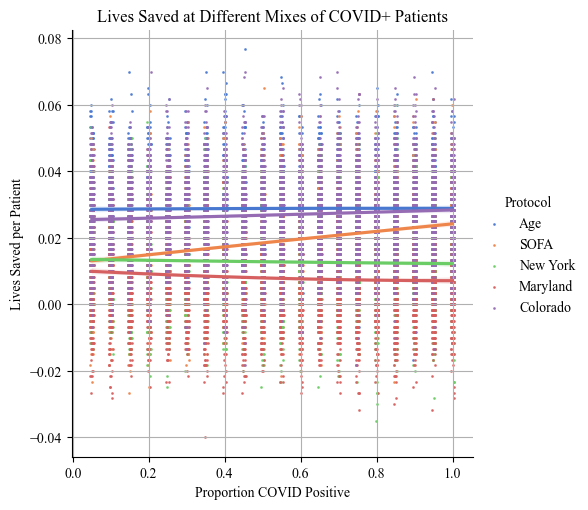

In [7]:
#Lives Saved Rate GRAPHS
plot1a = sns.lmplot(x="COVID_Mix", y="LS_rate", 
                    hue="Protocol", 
                    #col='Protocol',
                    #col_order=protocol_order, 
                    #col_wrap=3, 
                    hue_order=protocol_order,
                    data=stats_overall_Mix,
                    order=2,
                    x_jitter=0.005,
    scatter_kws={"s": 1},
    palette='muted' 
)
plot1a.set(title='Lives Saved at Different Mixes of COVID+ Patients', xlabel="Proportion COVID Positive", ylabel="Lives Saved per Patient")
plt.savefig("figs/FigS11A.svg", format='svg')
plt.show()

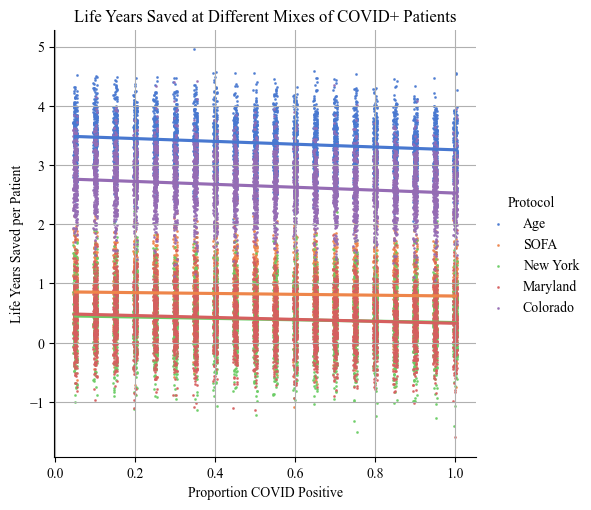

In [8]:
#Lives Saved Rate GRAPHS
plot2a = sns.lmplot(x="COVID_Mix", y="YLS_Cho_rate", 
                    hue="Protocol", 
                    #col='Protocol',
                    #col_order=protocol_order, 
                    #col_wrap=3, 
                    hue_order=protocol_order,
                    data=stats_Cho_overall_Mix,
                    order=1,
                    x_jitter=0.005,
    scatter_kws={"s": 1},
    palette='muted' 
)
plot2a.set(title='Life Years Saved at Different Mixes of COVID+ Patients', xlabel="Proportion COVID Positive", ylabel="Life Years Saved per Patient")
plt.savefig("figs/FigS11B.svg", format='svg')
plt.show()